# Capstone Project - The Battle of Neighbourhoods 

## Introduction: Business Problem

The objective of this report is to provide the appropriate and relevant information to interested stakeholders looking to start their own businesses in the city of Vancouver, Canada. This report aims to help determine if a safe and secure location exists for the establishment of businesses and also, evaluate the feasibility of setting up offices in Vancouver. 

In the first task, we will be looking at crime data targetted at potential stakeholders looking to set up grocery stalls in Vancouver. Some of the data we will be looking at include, but not limited to, the number of crimes, the number of stores grouped by location and locations where grocery stores are uncommon. 

We will make use of data science tools to analyze the data to focus on the safest location, explore its neighbourhoods and the 10 most common venues in each neighbourhood. This way, we hope that the best neighbourhood where grocery stores are uncommon can be shortlisted.

## Data

Based on the definition of our problem, factors that might influence our decission are:

   1. Finding the safest locations based on crime statistics
   2. Finding for most common locations
   3. Selecting the right neighbourhood within the borough
    
This report will be using the geographical coordinates of Vancouver to plot for neighbourhoods in a borough that is safe and in the vicinity of the city. Finally, we will cluster the neighbourhoods and present the findings.

Following data sources will be needed to extract/generate the required information:

**Part 1:** Using a real world data set from Kaggle containing the Vancouver Crimes from 2003 to 2019: A dataset consisting of the crime statistics of each neighbourhood in Vancouver along with type of crime, recorded year, month and hour.

**Part 2:** Gathering additional information of the list of officially categorized boroughs in Vancouver from Wikipedia. Borough information will be used to map the existing data where each neighbourhood can be assigned with the right borough.

**Part 3:** Creating a new consolidated dataset of the neighbourhoods, along with their boroughs, crime data and the respective neighbourhood's coordinates. This data will be fetched using OpenCage Geocoder to find the safest borough and explore the neighbourhood by plotting it on maps using Folium. Exploratory data analysis will also be performed.

**Part 4:** Creating a new consolidated dataset of the neighbourhoods, boroughs, most common venues and the respective neighbourhood along with coordinates.: This data will be fetched using Four Square API to explore the neighbourhood venues and to apply machine learning algorithm to cluster the neighbourhoods. The findings will be presented by plotting it on maps using Folium.

## Part 1: Using a real world data set from Kaggle containing the Vancouver Crimes from 2003 to 2019

**Vancouver Crime Report**

*https://www.kaggle.com/agilesifaka/vancouver-crime-report/version/2* 

In [1]:
import numpy as np
import pandas as pd

# Command to install OpenCage Geocoder for fetching latitude and longitude of neighbourhood
!pip install opencage

#Importing OpenCage Geocoder
from opencage.geocoder import OpenCageGeocode

# Use the inline backend to generate the plots within the browser
%matplotlib inline 

# Importing Matplot lib and associated packages to perform Data Visualisation and Exploratory Data Analysis
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# Importing folium to visualise Maps and plot based on Lat and Lng
!pip install folium
import folium

# Requests to request web pages by making get requests to FourSquare REST Client
import requests

# To normalise data returned by FourSquare API
from pandas.io.json import json_normalize

# Importing KMeans from SciKit library to Classify neighbourhoods into clusters
from sklearn.cluster import KMeans

print('Libraries imported')

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
Matplotlib version:  3.2.2
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
     |████████████████████████████████| 94 kB 7.3 MB/s  eta 0:00:01
Libra

## Reading the Dataset

In [2]:
url = "https://raw.githubusercontent.com/RamanujaSVL/Coursera_Capstone/master/vancouver_crime_records_2018.csv"
vnc_crime = pd.read_csv(url, index_col=None)
vnc_crime

,Unnamed: 0,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y
0,11,Break and Enter Commercial,2018,3,2,6,17,10XX ALBERNI ST,West End,491058.816893,5.459123e+06
1,38,Break and Enter Commercial,2018,6,16,18,0,10XX ALBERNI ST,West End,491102.243911,5.459092e+06
2,97,Break and Enter Commercial,2018,12,12,0,0,10XX BEACH AVE,West End,490227.222455,5.458210e+06
3,110,Break and Enter Commercial,2018,4,9,6,0,10XX BEACH AVE,Central Business District,490249.230710,5.458167e+06
4,152,Break and Enter Commercial,2018,10,2,18,31,10XX BEACH AVE,Central Business District,490258.682976,5.458155e+06
...,...,...,...,...,...,...,...,...,...,...,...
38072,624005,Vehicle Collision or Pedestrian Struck (with I...,2018,9,7,9,53,YUKON ST / SW MARINE DR,Marpole,491619.000000,5.450905e+06
38073,624006,Vehicle Collision or Pedestrian Struck (with I...,2018,10,1,11,25,YUKON ST / SW MARINE DR,Marpole,491619.000000,5.450905e+06
38074,624018,Vehicle Collision or Pedestrian Struck (with I...,2018,8,5,17,46,YUKON ST / W 12TH AVE,Mount Pleasant,491778.000000,5.456408e+06
38075,624023,Vehicle Collision or Pedestrian Struck (with I...,2018,9,10,17,39,YUKON ST / W 17TH AVE,Riley Park,491811.000000,5.455898e+06


In [3]:
# Dropping the X and Y columns (latitude and longitude coordinates) because the data seems to be corrupt
# Also dropping other irrelevant columns leaving only TYPE, YEAR, MONTH, DAY, HOUR, NEIGHBOURHOOD columns
vnc_crime.drop(["Unnamed: 0", "MINUTE", "HUNDRED_BLOCK", "X", "Y"], axis=1, inplace=True)
vnc_crime.head()

,TYPE,YEAR,MONTH,DAY,HOUR,NEIGHBOURHOOD
0,Break and Enter Commercial,2018,3,2,6,West End
1,Break and Enter Commercial,2018,6,16,18,West End
2,Break and Enter Commercial,2018,12,12,0,West End
3,Break and Enter Commercial,2018,4,9,6,Central Business District
4,Break and Enter Commercial,2018,10,2,18,Central Business District


In [4]:
# Changing names of column
vnc_crime.columns = ["Type", "Year", "Month", "Day", "Hour", "Neighbourhood"]
vnc_crime.head()

,Type,Year,Month,Day,Hour,Neighbourhood
0,Break and Enter Commercial,2018,3,2,6,West End
1,Break and Enter Commercial,2018,6,16,18,West End
2,Break and Enter Commercial,2018,12,12,0,West End
3,Break and Enter Commercial,2018,4,9,6,Central Business District
4,Break and Enter Commercial,2018,10,2,18,Central Business District


In [5]:
# Total number of crimes in each unique neighbourhood
vnc_crime["Neighbourhood"].value_counts()

Central Business District    10857
West End                      3031
Mount Pleasant                2396
Strathcona                    1987
Kitsilano                     1802
Fairview                      1795
Renfrew-Collingwood           1762
Grandview-Woodland            1761
Kensington-Cedar Cottage      1391
Hastings-Sunrise              1270
Sunset                         967
Riley Park                     866
Marpole                        828
Victoria-Fraserview            600
Killarney                      565
Oakridge                       499
Dunbar-Southlands              474
Kerrisdale                     417
Shaughnessy                    414
West Point Grey                372
Arbutus Ridge                  311
South Cambie                   292
Stanley Park                   154
Musqueam                        17
Name: Neighbourhood, dtype: int64

## Part 2: Gathering additional information about the Neighbourhood from Wikipedia

In [6]:
# Define dataframe column names
column_names = ["Neighbourhood", "Borough"]

# Instantiate the dataframe
vnc_df = pd.DataFrame(columns=column_names)

vnc_df["Neighbourhood"] = vnc_crime["Neighbourhood"].unique()
vnc_df.head(10)

,Neighbourhood,Borough
0,West End,NaN
1,Central Business District,NaN
2,Hastings-Sunrise,NaN
3,Grandview-Woodland,NaN
4,Mount Pleasant,NaN
5,Strathcona,NaN
6,Shaughnessy,NaN
7,Sunset,NaN
8,Fairview,NaN
9,Oakridge,NaN


In [7]:
neighbourhood_dict = {'Central Business District':'Central', 'West End':'Central', 'Stanley Park':'Central', 'Victoria-Fraserview':'South Vancouver',
                  'Killarney':'South Vancouver', 'Musqueam':'South Vancouver', 'Mount Pleasant':'East Side', 'Strathcona':'East Side',
                  'Renfrew-Collingwood':'East Side', 'Grandview-Woodland':'East Side', 'Kensington-Cedar Cottage':'East Side', 'Hastings-Sunrise':'East Side',
                  'Sunset':'East Side', 'Riley Park':'East Side', 'Kitsilano':'West Side', 'Fairview':'West Side',
                  'Marpole':'West Side', 'Oakridge':'West Side', 'Dunbar-Southlands':'West Side', 'Kerrisdale':'West Side',
                  'Shaughnessy':'West Side', 'West Point Grey':'West Side', 'Arbutus Ridge':'West Side', 'South Cambie':'West Side'}

for key, neighbourhood in zip(neighbourhood_dict, vnc_df["Neighbourhood"]):
    vnc_df.loc[vnc_df.Neighbourhood == key, "Borough"] = neighbourhood_dict[key]

# Drop NaN values in vnc_df
vnc_df.dropna(inplace=True)

print("Total neighbourhood count: {}".format(len(vnc_df["Neighbourhood"])))
print("Total borough count: {}".format(len(vnc_df["Borough"].unique())))
vnc_df.head()

Total neighbourhood count: 24
Total borough count: 4


,Neighbourhood,Borough
0,West End,Central
1,Central Business District,Central
2,Hastings-Sunrise,East Side
3,Grandview-Woodland,East Side
4,Mount Pleasant,East Side


In [8]:
# Merge crime dataframe to vnc_df
vnc_new_df = pd.merge(left=vnc_df, right=vnc_crime, on="Neighbourhood")
vnc_new_df.head()

,Neighbourhood,Borough,Type,Year,Month,Day,Hour
0,West End,Central,Break and Enter Commercial,2018,3,2,6
1,West End,Central,Break and Enter Commercial,2018,6,16,18
2,West End,Central,Break and Enter Commercial,2018,12,12,0
3,West End,Central,Break and Enter Commercial,2018,3,2,3
4,West End,Central,Break and Enter Commercial,2018,3,17,11


In [9]:
# Data clearing and preparation
vnc_new_df.dropna(inplace=True)
vnc_new_df["Borough"].value_counts()

Central            14042
East Side          12400
West Side           7204
South Vancouver     1182
Name: Borough, dtype: int64

## Methodology Exploratory Data Analysis and modelling

In [10]:
# Exploratory data analysis
vnc_crime_type = pd.pivot_table(vnc_new_df,
                               values="Year",
                               index="Borough",
                               columns="Type",
                               aggfunc=len, 
                               fill_value=0,
                               margins=True)
vnc_crime_type

Type,Break and Enter Commercial,Break and Enter Residential/Other,Mischief,Other Theft,Theft from Vehicle,Theft of Bicycle,Theft of Vehicle,Vehicle Collision or Pedestrian Struck (with Fatality),Vehicle Collision or Pedestrian Struck (with Injury),All
Borough,,,,,,,,,,
Central,787,198,2280,2489,6871,857,245,1,314,14042
East Side,786,1043,2192,1674,4754,678,605,8,660,12400
South Vancouver,49,156,187,88,483,36,71,1,111,1182
West Side,403,1000,1062,696,2838,588,225,3,389,7204
All,2025,2397,5721,4947,14946,2159,1146,13,1474,34828


## Boroughs Ranked by Total Number of Crimes

In [11]:
vnc_crime_type.reset_index(inplace=True)
vnc_crime_type.rename(columns={"All": "Total"}, inplace=True)
# Remove "All" row
vnc_crime_type = vnc_crime_type.head(4)
vnc_crime_type

Type,Borough,Break and Enter Commercial,Break and Enter Residential/Other,Mischief,Other Theft,Theft from Vehicle,Theft of Bicycle,Theft of Vehicle,Vehicle Collision or Pedestrian Struck (with Fatality),Vehicle Collision or Pedestrian Struck (with Injury),Total
0,Central,787,198,2280,2489,6871,857,245,1,314,14042
1,East Side,786,1043,2192,1674,4754,678,605,8,660,12400
2,South Vancouver,49,156,187,88,483,36,71,1,111,1182
3,West Side,403,1000,1062,696,2838,588,225,3,389,7204


In [12]:
# Get Borough and Total columns
vnc_borough_ranked = vnc_crime_type[["Borough", "Total"]]

# Reset index to Borough column
vnc_borough_ranked.set_index("Borough", inplace=True)

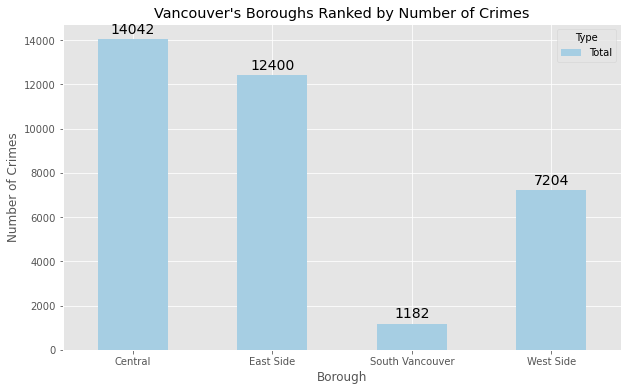

In [13]:
# Plot a bar graph of Vancouver's boroughs ranked by number of crimes
ax = vnc_borough_ranked.plot(kind="bar", figsize=(10, 6), colormap="Paired", rot=0)

# Set labels
ax.set_title("Vancouver's Boroughs Ranked by Number of Crimes")
ax.set_xlabel("Borough")
ax.set_ylabel("Number of Crimes")

# Display values on bar chart
for i, p in enumerate(ax.patches):
    ax.annotate(p.get_height(),
                (i, p.get_height()),
                ha="center",
                va="center",
                xytext=(0, 10),
                textcoords='offset points',
                fontsize = 14
               )

In [14]:
vnc_neighbourhood_type = pd.pivot_table(vnc_new_df,
                                       values="Year",
                                       index="Neighbourhood",
                                       columns="Type",
                                       aggfunc=len,
                                       fill_value=0,
                                       margins=True)
vnc_neighbourhood_type

Type,Break and Enter Commercial,Break and Enter Residential/Other,Mischief,Other Theft,Theft from Vehicle,Theft of Bicycle,Theft of Vehicle,Vehicle Collision or Pedestrian Struck (with Fatality),Vehicle Collision or Pedestrian Struck (with Injury),All
Neighbourhood,,,,,,,,,,
Arbutus Ridge,12,78,49,18,111,12,12,1,18,311
Central Business District,551,124,1812,2034,5301,640,165,0,230,10857
Dunbar-Southlands,8,106,81,31,199,16,9,1,23,474
Fairview,138,73,233,297,692,245,55,0,62,1795
Grandview-Woodland,148,162,304,215,634,110,123,0,65,1761
Hastings-Sunrise,48,117,195,107,607,52,74,0,70,1270
Kensington-Cedar Cottage,62,145,255,148,541,69,71,3,97,1391
Kerrisdale,24,97,49,9,172,13,11,0,42,417
Killarney,34,72,90,31,240,19,33,0,46,565


In [15]:
vnc_neighbourhood_type.reset_index(inplace=True)
vnc_neighbourhood_type.rename(columns={"All": "Total"}, inplace=True)
# Remove "All" row
vnc_neighbourhood_type = vnc_neighbourhood_type.head(24)
vnc_neighbourhood_type

Type,Neighbourhood,Break and Enter Commercial,Break and Enter Residential/Other,Mischief,Other Theft,Theft from Vehicle,Theft of Bicycle,Theft of Vehicle,Vehicle Collision or Pedestrian Struck (with Fatality),Vehicle Collision or Pedestrian Struck (with Injury),Total
0,Arbutus Ridge,12,78,49,18,111,12,12,1,18,311
1,Central Business District,551,124,1812,2034,5301,640,165,0,230,10857
2,Dunbar-Southlands,8,106,81,31,199,16,9,1,23,474
3,Fairview,138,73,233,297,692,245,55,0,62,1795
4,Grandview-Woodland,148,162,304,215,634,110,123,0,65,1761
5,Hastings-Sunrise,48,117,195,107,607,52,74,0,70,1270
6,Kensington-Cedar Cottage,62,145,255,148,541,69,71,3,97,1391
7,Kerrisdale,24,97,49,9,172,13,11,0,42,417
8,Killarney,34,72,90,31,240,19,33,0,46,565
9,Kitsilano,106,165,320,154,755,189,51,1,61,1802


In [16]:
vnc_crime_type.describe()

Type,Break and Enter Commercial,Break and Enter Residential/Other,Mischief,Other Theft,Theft from Vehicle,Theft of Bicycle,Theft of Vehicle,Vehicle Collision or Pedestrian Struck (with Fatality),Vehicle Collision or Pedestrian Struck (with Injury),Total
count,4.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
mean,506.250000,599.250000,1430.25000,1236.750000,3736.500000,539.750000,286.500000,3.250000,368.500000,8707.000000
std,354.409721,488.189427,997.26572,1060.087221,2723.536977,353.955153,226.117226,3.304038,227.060198,5801.870618
min,49.000000,156.000000,187.00000,88.000000,483.000000,36.000000,71.000000,1.000000,111.000000,1182.000000
25%,314.500000,187.500000,843.25000,544.000000,2249.250000,450.000000,186.500000,1.000000,263.250000,5698.500000
50%,594.500000,599.000000,1627.00000,1185.000000,3796.000000,633.000000,235.000000,2.000000,351.500000,9802.000000
75%,786.250000,1010.750000,2214.00000,1877.750000,5283.250000,722.750000,335.000000,4.250000,456.750000,12810.500000
max,787.000000,1043.000000,2280.00000,2489.000000,6871.000000,857.000000,605.000000,8.000000,660.000000,14042.000000


## Top 5 Lowest Crime Neighbourhoods

In [17]:
vnc_neighbourhood_type.sort_values(["Total"], ascending=True, axis=0, inplace=True)
# Get the top five safest neighbourhoods
vnc_safest5 = vnc_neighbourhood_type.iloc[:5]
vnc_safest5

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


Type,Neighbourhood,Break and Enter Commercial,Break and Enter Residential/Other,Mischief,Other Theft,Theft from Vehicle,Theft of Bicycle,Theft of Vehicle,Vehicle Collision or Pedestrian Struck (with Fatality),Vehicle Collision or Pedestrian Struck (with Injury),Total
12,Musqueam,0,4,3,0,4,2,2,0,2,17
18,Stanley Park,6,2,8,0,109,14,3,0,12,154
17,South Cambie,22,42,41,38,111,19,8,0,11,292
0,Arbutus Ridge,12,78,49,18,111,12,12,1,18,311
23,West Point Grey,18,71,50,11,157,32,11,0,22,372


In [18]:
# Get Neighbourhood and Total columns
vnc_safest5 = vnc_safest5[["Neighbourhood", "Total"]]

# Set index to Neighbourhood column
vnc_safest5.set_index("Neighbourhood", inplace=True)

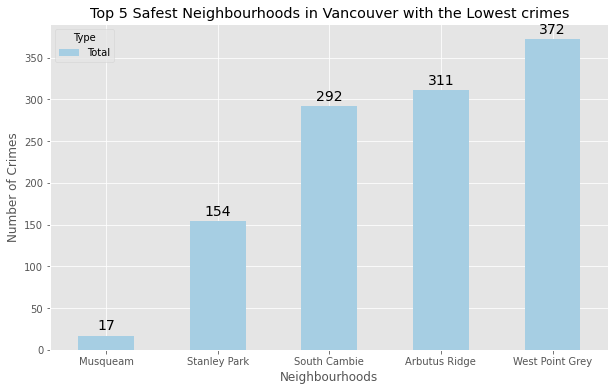

In [19]:
# Plot a bar graph of Vancouver's top five safest neighbourhoods
ax = vnc_safest5.plot(kind="bar", figsize=(10, 6), colormap="Paired", rot=0)

# Set labels
ax.set_title("Top 5 Safest Neighbourhoods in Vancouver with the Lowest crimes")
ax.set_ylabel("Number of Crimes")
ax.set_xlabel("Neighbourhoods")

# Display values on bar chart
for i, p in enumerate(ax.patches):
    ax.annotate(p.get_height(),
               (i, p.get_height()),
                ha='center', 
                va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize = 14
               )

## Top 5 Highest Crime Neighbourhoods

In [20]:
vnc_neighbourhood_type.sort_values(["Total"], ascending=False, axis=0, inplace=True)
# Get the top five unsafest neighbourhoods
vnc_unsafest5 = vnc_neighbourhood_type.iloc[:5]
vnc_unsafest5

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


Type,Neighbourhood,Break and Enter Commercial,Break and Enter Residential/Other,Mischief,Other Theft,Theft from Vehicle,Theft of Bicycle,Theft of Vehicle,Vehicle Collision or Pedestrian Struck (with Fatality),Vehicle Collision or Pedestrian Struck (with Injury),Total
1,Central Business District,551,124,1812,2034,5301,640,165,0,230,10857
22,West End,230,72,460,455,1461,203,77,1,72,3031
11,Mount Pleasant,205,124,353,493,822,232,67,0,100,2396
19,Strathcona,160,124,527,81,821,108,76,2,88,1987
9,Kitsilano,106,165,320,154,755,189,51,1,61,1802


In [21]:
vnc_unsafest5 = vnc_unsafest5[["Neighbourhood", "Total"]]

# Reset index to Neighbourhood column
vnc_unsafest5.set_index("Neighbourhood", inplace=True)

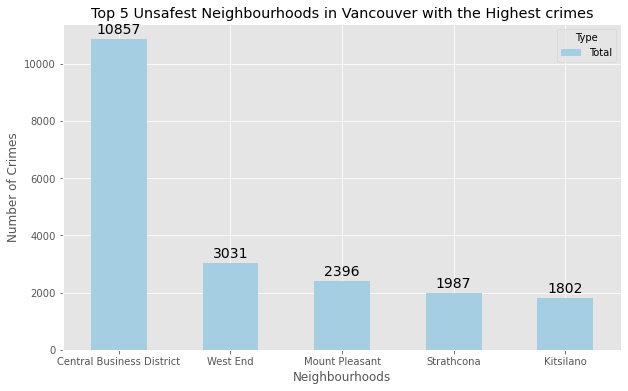

In [22]:
# Plot a bar graph of Vancouver's top five unsafest neighbourhoods
ax = vnc_unsafest5.plot(kind="bar", figsize=(10, 6), colormap="Paired", rot=0)

# Set labels
ax.set_title("Top 5 Unsafest Neighbourhoods in Vancouver with the Highest crimes")
ax.set_ylabel("Number of Crimes")
ax.set_xlabel("Neighbourhoods")

# Display values on bar chart
for i, p in enumerate(ax.patches):
    ax.annotate(p.get_height(),
               (i, p.get_height()),
               ha="center",
               va="center",
               xytext=(0, 10),
               textcoords="offset points",
               fontsize=14
               )

## Data Analysis

Total number of neighbourhoods in South Vancouver borough.

In [23]:
print("Number of neighbourhoods in South Vancouver: {}".format(len(vnc_df[vnc_df["Borough"] == "South Vancouver"])))
print("Number of neighbourhoods in West Side: {}".format(len(vnc_df[vnc_df["Borough"] == "West Side"])))

Number of neighbourhoods in South Vancouver: 3
Number of neighbourhoods in West Side: 10


Based on exploratory data analysis it seems that South Vancouver has the lowest crimes. However, since South Vancouver has very little number of neighbourhoods (makes up only **12.5%** of Vancouver), opening a commercial establishment would not be in favour for the business. For a higher chance of profitability, it is better we opt for the West Side which has the **second lowest crime and makes up 42%** of Vancouver.

## Deeper Insight into the Types of Crimes in West Side Vancouver

In [24]:
vnc_ws_crime = vnc_crime_type[vnc_crime_type["Borough"] == "West Side"]
# Remove Total column
vnc_ws_crime.drop(["Total"], axis=1, inplace=True)
# Set index to Borough column
vnc_ws_crime.set_index("Borough", inplace=True)
vnc_ws_crime

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Type,Break and Enter Commercial,Break and Enter Residential/Other,Mischief,Other Theft,Theft from Vehicle,Theft of Bicycle,Theft of Vehicle,Vehicle Collision or Pedestrian Struck (with Fatality),Vehicle Collision or Pedestrian Struck (with Injury)
Borough,,,,,,,,,
West Side,403,1000,1062,696,2838,588,225,3,389


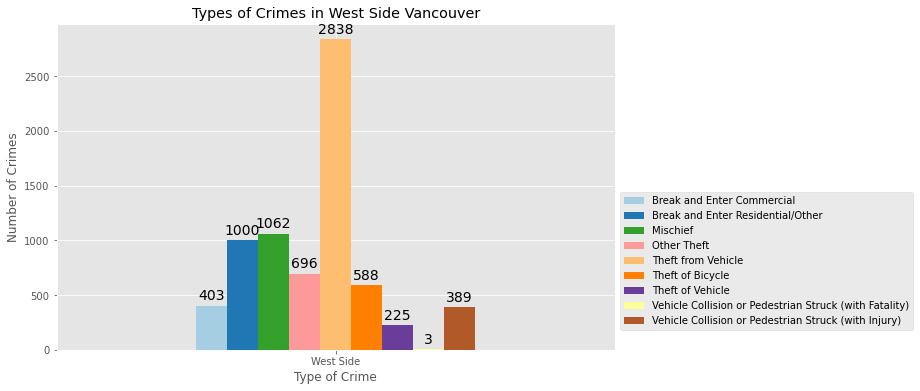

In [25]:
# Plot a bar graph of the different types of crimes in West Side Vancouver
ax = vnc_ws_crime.plot(kind="bar", figsize=(10, 6), colormap="Paired", rot=0)

# Set labels
ax.set_title("Types of Crimes in West Side Vancouver")
ax.set_ylabel("Number of Crimes")
ax.set_xlabel("Type of Crime")

# Display values on bar chart
for i, p in enumerate(ax.patches):
    ax.annotate(p.get_height(),
               (p.get_x()+p.get_width()/3, p.get_height()),
               ha="center",
               va="center",
               xytext=(5, 10),
               textcoords="offset points",
               fontsize=14
               )
    # Adjust legends
    ax.legend(loc='upper left', bbox_to_anchor=(1.00, 0.5))

In [26]:
vnc_crime

,Type,Year,Month,Day,Hour,Neighbourhood
0,Break and Enter Commercial,2018,3,2,6,West End
1,Break and Enter Commercial,2018,6,16,18,West End
2,Break and Enter Commercial,2018,12,12,0,West End
3,Break and Enter Commercial,2018,4,9,6,Central Business District
4,Break and Enter Commercial,2018,10,2,18,Central Business District
...,...,...,...,...,...,...
38072,Vehicle Collision or Pedestrian Struck (with I...,2018,9,7,9,Marpole
38073,Vehicle Collision or Pedestrian Struck (with I...,2018,10,1,11,Marpole
38074,Vehicle Collision or Pedestrian Struck (with I...,2018,8,5,17,Mount Pleasant
38075,Vehicle Collision or Pedestrian Struck (with I...,2018,9,10,17,Riley Park


In [27]:
vnc_ws_neighbourhood = vnc_df[vnc_df["Borough"] == "West Side"]
vnc_ws_neighbourhood.reset_index(drop=True, inplace=True)

print("Number of neighbourhoods in West Side: {}".format(len(vnc_df[vnc_df["Borough"] == "West Side"])))

Number of neighbourhoods in West Side: 10


In [28]:
# Print all neighbourhoods in West Side Vancouver
for neighbourhood in vnc_ws_neighbourhood["Neighbourhood"]:
    print(neighbourhood)

Shaughnessy
Fairview
Oakridge
Marpole
Kitsilano
Kerrisdale
West Point Grey
Arbutus Ridge
South Cambie
Dunbar-Southlands


In [29]:
# neighbourhood latiude and longitude
Latitude = []
Longitude = []
Borough = []
Neighbourhood = vnc_ws_neighbourhood["Neighbourhood"].unique()



key = "830323b5ca694362904814ff0a11b803"
geocoder = OpenCageGeocode(key)

for i in range(len(Neighbourhood)):
    address = "{}, Vancouver, BC, Canada".format(Neighbourhood[i])
    location = geocoder.geocode(address)
    Latitude.append(location[0]["geometry"]["lat"])
    Longitude.append(location[0]["geometry"]["lng"])
    Borough.append("West Side")
print(Latitude, Longitude)

# print('The geograpical coordinate of Vancouver City are {}, {}.'.format(latitude, longitude))

[49.2463051, 49.2619557, 49.2266149, 49.2092233, 49.2694099, 49.2209848, 49.2681022, 49.2463051, 49.2464639, 49.237864] [-123.1384051, -123.1304084, -123.1229433, -123.1361495, -123.155267, -123.1595484, -123.2026425, -123.159636, -123.1216027, -123.1843544]


In [30]:
ws_neighbourhood_dict = {"Neighbourhood": Neighbourhood, "Borough": Borough, "Latitude": Latitude, "Longitude": Longitude}
ws_neighbourhood_geo = pd.DataFrame(data=ws_neighbourhood_dict, columns=["Neighbourhood", "Borough", "Latitude", "Longitude"], index=None)

ws_neighbourhood_geo

,Neighbourhood,Borough,Latitude,Longitude
0,Shaughnessy,West Side,49.246305,-123.138405
1,Fairview,West Side,49.261956,-123.130408
2,Oakridge,West Side,49.226615,-123.122943
3,Marpole,West Side,49.209223,-123.136150
4,Kitsilano,West Side,49.269410,-123.155267
5,Kerrisdale,West Side,49.220985,-123.159548
6,West Point Grey,West Side,49.268102,-123.202642
7,Arbutus Ridge,West Side,49.246305,-123.159636
8,South Cambie,West Side,49.246464,-123.121603
9,Dunbar-Southlands,West Side,49.237864,-123.184354


In [31]:
address = "Vancouver, BC, Canada"

location = geocoder.geocode(address)
latitude = location[0]["geometry"]["lat"]
longitude = location[0]["geometry"]["lng"]

print("The geograpical coordinate of Vancouver, Canada are {}, {}.".format(latitude, longitude))

The geograpical coordinate of Vancouver, Canada are 49.2608724, -123.1139529.


## Part 3: Creation of Folium Map of Consolidated Dataset

In [32]:
# Folium map West Side Borough and it's Neighbourhoods
van_map = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, borough, neighbourhood in zip(ws_neighbourhood_geo["Latitude"], ws_neighbourhood_geo["Longitude"], ws_neighbourhood_geo["Borough"], ws_neighbourhood_geo["Neighbourhood"]):
    label = "{}, {}".format(neighbourhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.Marker(
        [lat, lng],
        radius=5,
        popup=label,
        parse_html=False).add_to(van_map)  
    
van_map

## Part 4: Creation of new dataset neighbourhoods, boroughs and the most common venues along with location coordinates

In [33]:
# Four Square Credentials

CLIENT_ID = "XJDGIL0NRYQUQGI2EOFE1A2NI3CRYGMQVDHXWNS11G22YMOE"
CLIENT_SECRET = "YNLD1JWCDIOVYVCFJQMA1TBAOH3MVBJA24RFDUPPVDSMOHTI"
VERSION = "20191101"
LIMIT = 100

print("Your credentails:")
print("CLIENT_ID: " + CLIENT_ID)
print("CLIENT_SECRET: " + CLIENT_SECRET)

Your credentails:
CLIENT_ID: XJDGIL0NRYQUQGI2EOFE1A2NI3CRYGMQVDHXWNS11G22YMOE
CLIENT_SECRET: YNLD1JWCDIOVYVCFJQMA1TBAOH3MVBJA24RFDUPPVDSMOHTI


In [35]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
        
        # create the API request URL
        url = "https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}".format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)

        # make the GET request
        results = requests.get(url).json()["response"]["groups"][0]["items"]

        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v["venue"]["name"],  
            v["venue"]["categories"][0]["name"]) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ["Neighbourhood", 
                            "Neighbourhood Latitude", 
                            "Neighbourhood Longitude", 
                            "Venue", 
                            "Venue Category"]

    return(nearby_venues)  

In [36]:
vnc_ws_venues = getNearbyVenues(names=ws_neighbourhood_geo["Neighbourhood"],
                                   latitudes=ws_neighbourhood_geo["Latitude"],
                                   longitudes=ws_neighbourhood_geo["Longitude"])

Shaughnessy
Fairview
Oakridge
Marpole
Kitsilano
Kerrisdale
West Point Grey
Arbutus Ridge
South Cambie
Dunbar-Southlands


In [39]:
vnc_ws_venues.groupby("Neighbourhood").count().drop(["Neighbourhood Latitude", "Neighbourhood Longitude", "Venue Category"], axis=1)

,Venue
Neighbourhood,
Arbutus Ridge,8
Dunbar-Southlands,12
Fairview,20
Kerrisdale,4
Kitsilano,47
Marpole,30
Oakridge,8
Shaughnessy,6
South Cambie,11


In [40]:
print("There are {} uniques categories.".format(len(vnc_ws_venues["Venue Category"].unique())))

There are 84 uniques categories.


In [41]:
# one hot encoding
vnc_onehot = pd.get_dummies(vnc_ws_venues[["Venue Category"]], prefix="", prefix_sep="")

# add neighbourhood column back to dataframe
vnc_onehot["Neighbourhood"] = vnc_ws_venues["Neighbourhood"] 

# move neighbourhood column to the first column
fixed_columns = [vnc_onehot.columns[-1]] + list(vnc_onehot.columns[:-1])
vnc_onehot = vnc_onehot[fixed_columns]

vnc_onehot.head()

,Neighbourhood,American Restaurant,Asian Restaurant,BBQ Joint,Bakery,Bank,Bar,Beach,Breakfast Spot,Bubble Tea Shop,...,Tea Room,Tennis Court,Thai Restaurant,Theater,Toy / Game Store,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Yoga Studio
0,Shaughnessy,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Shaughnessy,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,Shaughnessy,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Shaughnessy,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Shaughnessy,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
vnc_onehot.shape

(153, 85)

In [43]:
vnc_ws_grouped = vnc_onehot.groupby("Neighbourhood").mean().reset_index()
vnc_ws_grouped

,Neighbourhood,American Restaurant,Asian Restaurant,BBQ Joint,Bakery,Bank,Bar,Beach,Breakfast Spot,Bubble Tea Shop,...,Tea Room,Tennis Court,Thai Restaurant,Theater,Toy / Game Store,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Yoga Studio
0,Arbutus Ridge,0.000000,0.000000,0.00,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
1,Dunbar-Southlands,0.000000,0.000000,0.00,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
2,Fairview,0.000000,0.050000,0.05,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.05,0.05,0.000000,0.000000,0.000000,0.050000,0.000000
3,Kerrisdale,0.000000,0.000000,0.00,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
4,Kitsilano,0.042553,0.021277,0.00,0.06383,0.000000,0.000000,0.021277,0.021277,0.000000,...,0.021277,0.021277,0.042553,0.00,0.00,0.021277,0.000000,0.000000,0.000000,0.021277
5,Marpole,0.000000,0.000000,0.00,0.00000,0.033333,0.033333,0.000000,0.000000,0.033333,...,0.000000,0.000000,0.033333,0.00,0.00,0.000000,0.000000,0.033333,0.033333,0.000000
6,Oakridge,0.000000,0.000000,0.00,0.00000,0.000000,0.000000,0.000000,0.000000,0.125000,...,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.125000,0.000000
7,Shaughnessy,0.000000,0.000000,0.00,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.166667,0.000000,0.000000,0.000000
8,South Cambie,0.000000,0.000000,0.00,0.00000,0.090909,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
9,West Point Grey,0.000000,0.000000,0.00,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000


In [44]:
vnc_ws_grouped.shape

(10, 85)

In [45]:
num_top_venues = 5

for hood in vnc_ws_grouped["Neighbourhood"]:
    print("----"+hood+"----")
    temp = vnc_ws_grouped[vnc_ws_grouped["Neighbourhood"] == hood].T.reset_index()
    temp.columns = ["venue", "freq"]
    temp = temp.iloc[1:]
    temp["freq"] = temp["freq"].astype(float)
    temp = temp.round({"freq": 2})
    print(temp.sort_values("freq", ascending=False).reset_index(drop=True).head(num_top_venues))
    print("\n")

----Arbutus Ridge----
                venue  freq
0      Discount Store  0.12
1         Supermarket  0.12
2      Sandwich Place  0.12
3  Seafood Restaurant  0.12
4        Dance Studio  0.12


----Dunbar-Southlands----
                  venue  freq
0         Grocery Store  0.25
1          Liquor Store  0.17
2  Gym / Fitness Center  0.08
3   Japanese Restaurant  0.08
4             Pet Store  0.08


----Fairview----
                           venue  freq
0                    Coffee Shop  0.10
1                 Sandwich Place  0.05
2               Asian Restaurant  0.05
3  Paper / Office Supplies Store  0.05
4              Korean Restaurant  0.05


----Kerrisdale----
         venue  freq
0         Café  0.25
1         Pool  0.25
2  Golf Course  0.25
3         Park  0.25
4     Pharmacy  0.00


----Kitsilano----
                 venue  freq
0               Bakery  0.06
1  American Restaurant  0.04
2       Clothing Store  0.04
3    French Restaurant  0.04
4      Thai Restaurant  0.04


----Ma

In [46]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [54]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighbourhoods_venues_sorted = pd.DataFrame(columns=columns)
neighbourhoods_venues_sorted['Neighbourhood'] = vnc_ws_grouped['Neighbourhood']

for ind in np.arange(vnc_ws_grouped.shape[0]):
    neighbourhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(vnc_ws_grouped.iloc[ind, :], num_top_venues)

neighbourhoods_venues_sorted.head()

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Arbutus Ridge,Coffee Shop,Grocery Store,Discount Store,Sandwich Place,Seafood Restaurant,Shopping Mall,Supermarket,Dance Studio,Food & Drink Shop,Disc Golf
1,Dunbar-Southlands,Grocery Store,Liquor Store,Gym / Fitness Center,Coffee Shop,Pet Store,Café,Gym,Bus Stop,Japanese Restaurant,Harbor / Marina
2,Fairview,Coffee Shop,Camera Store,Vietnamese Restaurant,Physical Therapist,Park,Paper / Office Supplies Store,Restaurant,Nail Salon,Salon / Barbershop,Sandwich Place
3,Kerrisdale,Park,Pool,Golf Course,Café,Disc Golf,Falafel Restaurant,Fast Food Restaurant,Food & Drink Shop,Food Truck,French Restaurant
4,Kitsilano,Bakery,American Restaurant,Japanese Restaurant,Thai Restaurant,Clothing Store,Coffee Shop,Sushi Restaurant,Food Truck,French Restaurant,Ice Cream Shop


In [55]:
# set number of clusters
kclusters = 5

vnc_grouped_clustering = vnc_ws_grouped.drop('Neighbourhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(vnc_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([1, 1, 1, 0, 1, 1, 1, 3, 2, 4], dtype=int32)

In [56]:
# add clustering labels
neighbourhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

vancouver_merged = ws_neighbourhood_geo

# merge toronto_grouped with Vancouver data to add latitude/longitude for each neighbourhood
vancouver_merged = vancouver_merged.join(neighbourhoods_venues_sorted.set_index('Neighbourhood'), on='Neighbourhood')

vancouver_merged.head()

,Neighbourhood,Borough,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Shaughnessy,West Side,49.246305,-123.138405,3,Bus Stop,Print Shop,Video Game Store,Chocolate Shop,Park,Discount Store,Falafel Restaurant,Fast Food Restaurant,Food & Drink Shop,Food Truck
1,Fairview,West Side,49.261956,-123.130408,1,Coffee Shop,Camera Store,Vietnamese Restaurant,Physical Therapist,Park,Paper / Office Supplies Store,Restaurant,Nail Salon,Salon / Barbershop,Sandwich Place
2,Oakridge,West Side,49.226615,-123.122943,1,Light Rail Station,Vietnamese Restaurant,Coffee Shop,Fast Food Restaurant,Sandwich Place,Bubble Tea Shop,Sushi Restaurant,Sporting Goods Shop,Golf Course,Falafel Restaurant
3,Marpole,West Side,49.209223,-123.136150,1,Sushi Restaurant,Pizza Place,Coffee Shop,Chinese Restaurant,Liquor Store,Bubble Tea Shop,Dim Sum Restaurant,Plaza,Massage Studio,Gas Station
4,Kitsilano,West Side,49.269410,-123.155267,1,Bakery,American Restaurant,Japanese Restaurant,Thai Restaurant,Clothing Store,Coffee Shop,Sushi Restaurant,Food Truck,French Restaurant,Ice Cream Shop


In [64]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(vancouver_merged['Latitude'], vancouver_merged['Longitude'], vancouver_merged['Neighbourhood'], vancouver_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.Marker(
        [lat, lon],
        radius=5,
        popup=label).add_to(map_clusters)
       
map_clusters

## Results and Discussion

The objective of this business problem is to help stakeholders identify a safest location in Vancouver. And an appropriate neighbourhood within the borough to set up a commercial establishment specifically, a grocery store. This was achieved by first making use of Vancouver crime data to identify a safe borough with considerable number of neighbourhoods for any business to be viable. After selecting the borough it was imperative to choose the right neighbourhood where grocery shops were not among venues in a close proximity to each other. We achieved this by grouping the neighbourhoods into clusters to assist the stakeholders by providing them with relavent data about venues and safety of a given neighbourhood.

## Conclusion

We have explored the crime data to understand different types of crimes in all neighbourhoods of Vancouver and later categorized them into different boroughs, this helped us group the neighbourhoods into boroughs and choose the safest borough first. Once we confirmed the borough the number of neighbourhoods for consideration also comes down, we further shortlist the neighbourhoods based on the common venues, to choose a neighbourhood which best suits the business problem.